In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA
from signal_filter import Filter
import copy
from numpy import linalg as LA  

class decompose():
	def __init__(self, source_path):
		self.signal_filter = Filter(source_path)
		self.signal_source = (self.signal_filter.filtered_signal())
	def sk_learn_ICA(self, components_count):
		# ICA模型
		ica = FastICA(n_components=components_count)
		source = np.array((self.signal_source))
		source = source.reshape(1,-1)
		print("source shape",source.shape)
		print(source)
		# source = np.nan_to_num(source)
		print(np.isinf(source).any())
		print(np.isnan(source).any())
		# # source = source.reshape(1,-1)
		threshold_for_bug = 10
		# print(threshold_for_bug)
		# for i in range(len(source[0])):
		# 	print("worinidie",source[0][i])
		# 	if (abs(source[0][i])) < threshold_for_bug:
		# 		source[0][i] = threshold_for_bug
		source[source < threshold_for_bug] = threshold_for_bug
		# print(source)

		S_ = ica.fit_transform(source)  # 重构信号
		A_ = ica.mixing_  # 获得估计混合后的矩阵
		return S_
	def plot(self,signals,title='decomposition plot'):
		print("signals aa ",signals[0])
		# plt.title(title)
		# print(signals)
		# print(signals[0][0].shape)
		# plt.plot(len(sig),)
		# plt.figure()
		# for sig in signals:
		# 	plt.scatter(np.arange(len(sig)),sig)
		# 	plt.show()
	def helper(self,x):
		print("x shape is ",np.array(x).shape)
		plt.figure()
		plt.plot(np.arange(len(x)),x)
		plt.show()

	def low_rank():
		return "rinidie"
	def Fast_ICA(self,signal,iteration_max=10000,epsilon=0.01):
		max_count = iteration_max
		cirtical = epsilon
		input_signal = signal

		#demean the signal
		mean = np.mean(input_signal,axis=1)

		demean_signal = np.array([elem-i for elem,i in zip(input_signal,mean)])
		mean = np.mean(demean_signal,axis=1)

		return demean_signal


path = "/Users/luzhuoran/VCVR-Signal_Process/DATA/DataCollection2_ProfSowers_12March2018/demo_2.vhdr"
# decomposition = decompose(path)
# # print(decomposition.ICA(2))
# decomposition.ICA(2)

alpha_filter = Filter(path)
filtered_signal = alpha_filter.filtered_signal()

decomposition = decompose(path)
demean_sig = decomposition.Fast_ICA(filtered_signal)
# Cx = np.cov(np.array(demean_sig))

Extracting parameters from /Users/luzhuoran/VCVR-Signal_Process/DATA/DataCollection2_ProfSowers_12March2018/demo_2.vhdr...
Setting channel info structure...
Extracting parameters from /Users/luzhuoran/VCVR-Signal_Process/DATA/DataCollection2_ProfSowers_12March2018/demo_2.vhdr...
Setting channel info structure...
Reading 0 ... 55935  =      0.000 ...   109.248 secs...
Extracting parameters from /Users/luzhuoran/VCVR-Signal_Process/DATA/DataCollection2_ProfSowers_12March2018/demo_2.vhdr...
Setting channel info structure...
Extracting parameters from /Users/luzhuoran/VCVR-Signal_Process/DATA/DataCollection2_ProfSowers_12March2018/demo_2.vhdr...
Setting channel info structure...
Reading 0 ... 55935  =      0.000 ...   109.248 secs...


In [103]:
# print(Cx)
demean_sig = demean_sig[6:11]
print(demean_sig)
# demean_sig = np.array([demean_sig[0],demean_sig[1],demean_sig[2],demean_sig[3]])
R,C=demean_sig.shape  
print(R,C)
print(type(demean_sig))
print(np.cov(demean_sig))
Cx = np.cov(demean_sig)

[[  2.98877643e+00   3.39017347e+00   2.27342968e+00 ...,   2.24391461e+00
    3.37373327e+00   2.99083514e+00]
 [  2.20132613e+00   2.50964069e+00   1.65874101e+00 ...,   1.65023660e+00
    2.44490095e+00   2.17857131e+00]
 [  2.45223524e+00   2.79947341e+00   1.83969220e+00 ...,   1.84711883e+00
    2.68905407e+00   2.40677806e+00]
 [  6.89075019e-01   7.82867227e-01   5.56432621e-01 ...,   5.16616650e-01
    7.88682509e-01   7.02914727e-01]
 [  1.71266462e-03   7.09948318e-03   3.47164004e-02 ...,  -5.68259464e-03
    1.34117536e-02   1.57623898e-02]]
5 56335
<class 'numpy.ndarray'>
[[ 10146.46902552   9618.82096401   9762.93207891   8615.70184831
    8179.5387392 ]
 [  9618.82096401   9267.60430638   9362.37094476   8493.03276103
    8192.45357319]
 [  9762.93207891   9362.37094476   9569.42651928   8527.55233763
    8227.01946385]
 [  8615.70184831   8493.03276103   8527.55233763   8268.51743411
    8146.18589178]
 [  8179.5387392    8192.45357319   8227.01946385   8146.18589178
 

In [104]:
value,eigvector = np.linalg.eig(Cx)#计算协方差阵的特征值  
val=value**(-1/2)*np.eye(R, dtype=float)   
White=np.dot(val ,eigvector.T)  #白化矩阵  

Z=np.dot(White,demean_sig) #混合矩阵的主成分Z，Z为正交阵

In [105]:
W=0.5*np.ones([5,5])#weight matrix  

for n in range(R):  
    count=0      
    WP=W[:,n].reshape(R,1) #initialize  
    LastWP=np.zeros(R).reshape(R,1) # column vector ;LastWP=zeros(m,1);   
    while LA.norm(WP-LastWP,1)>0.0001:  
        #print(count," loop :",LA.norm(WP-LastWP,1))  
        count=count+1  
        LastWP=np.copy(WP)    #  last iteration value    
        gx=np.tanh(LastWP.T.dot(Z))  # row vector 
  
        for i in range(R):    
            tm1=np.mean( Z[i,:]*gx )   
            tm2=np.mean(1-gx**2)*LastWP[i] #fast 
            #tm2=np.mean(gx)*LastWP[i]     #slow  
            WP[i]=tm1 - tm2  
        #print(" wp :", WP.T )   
        WPP=np.zeros(R) #one dimensional zero vector  
        for j in range(n):    
            WPP=WPP+  WP.T.dot(W[:,j])* W[:,j]   
        WP.shape=1,R  
        WP=WP-WPP  
        WP.shape=R,1  
        WP=WP/(LA.norm(WP))  
        if(count ==10000):  
            print("reach Maxcount，exit loop",LA.norm(WP-LastWP,1))  
            break  
    print("loop count:",count )  
    W[:,n]=WP.reshape(R,)  
SZ=W.T.dot(Z) 

reach Maxcount，exit loop 2.62643385118
loop count: 10000
reach Maxcount，exit loop 3.36231527708
loop count: 10000
reach Maxcount，exit loop 3.31884273436
loop count: 10000
reach Maxcount，exit loop 2.70006385205
loop count: 10000
reach Maxcount，exit loop 3.39464013255
loop count: 10000


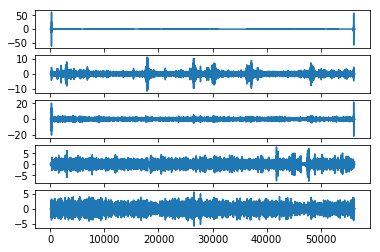

In [106]:
# plot extract signal  
x=np.arange(0,C)  
ax1 = plt.subplot(511)  
ax2 = plt.subplot(512)  
ax3 = plt.subplot(513)  
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
ax1.plot(x, SZ.T[:,0])  
ax2.plot(x, SZ.T[:,1])  
ax3.plot(x, SZ.T[:,2])  
ax4.plot(x, SZ.T[:,3])  
ax5.plot(x, SZ.T[:,4])  
plt.show()